<a href="https://colab.research.google.com/github/karunaadh/Arduino-Car-Bot/blob/main/YNCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


Step 1: Data Preparation

In [ ]:
# load csv file into dataframe
data = pd.read_csv('Hosted_Events_Attendance_Sample_Data.csv')

# display the first few rows
data.head()


,AcademicYear,Event Name,EventLocation,Month,DayOfWeek,Time,Semester,StudentDiscipline,StudentYear,EventType,EventOrganizer,CompanyIndustry
0,2022/2023,Roblox Technical Demo,"Bahen Building, Room 1170",October,3,7:00 PM,Fall,Other,1,Demo,Roblox,Gaming
1,2022/2023,Roblox Technical Demo,"Bahen Building, Room 1170",October,3,7:00 PM,Fall,Other,2,Demo,Roblox,Gaming
2,2022/2023,Roblox Technical Demo,"Bahen Building, Room 1170",October,3,7:00 PM,Fall,ECE,1,Demo,Roblox,Gaming
3,2022/2023,Roblox Technical Demo,"Bahen Building, Room 1170",October,3,7:00 PM,Fall,ECE,2,Demo,Roblox,Gaming
4,2022/2023,Roblox Technical Demo,"Bahen Building, Room 1170",October,3,7:00 PM,Fall,Other,1,Demo,Roblox,Gaming


In [ ]:
# check for data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AcademicYear       319 non-null    object
 1   Event Name         319 non-null    object
 2   EventLocation      319 non-null    object
 3   Month              319 non-null    object
 4   DayOfWeek          319 non-null    int64 
 5   Time               319 non-null    object
 6   Semester           319 non-null    object
 7   StudentDiscipline  319 non-null    object
 8   StudentYear        319 non-null    object
 9   EventType          319 non-null    object
 10  EventOrganizer     319 non-null    object
 11  CompanyIndustry    208 non-null    object
dtypes: int64(1), object(11)
memory usage: 30.0+ KB
None


In [ ]:
# check for missing values
print(data.isnull().sum())

AcademicYear           0
Event Name             0
EventLocation          0
Month                  0
DayOfWeek              0
Time                   0
Semester               0
StudentDiscipline      0
StudentYear            0
EventType              0
EventOrganizer         0
CompanyIndustry      111
dtype: int64


In [ ]:
# filter the DataFrame to show rows where 'CompanyIndustry' is null
missing_company_industry = data[data['CompanyIndustry'].isnull()]

# display the first few rows of the filtered df
print(missing_company_industry.head())

   AcademicYear                     Event Name              EventLocation  \
55    2022/2023  BCG: Alumni Panel and Q&amp;A  Bahen Building, Room 1180   
56    2022/2023  BCG: Alumni Panel and Q&amp;A  Bahen Building, Room 1180   
57    2022/2023  BCG: Alumni Panel and Q&amp;A  Bahen Building, Room 1180   
58    2022/2023  BCG: Alumni Panel and Q&amp;A  Bahen Building, Room 1180   
59    2022/2023  BCG: Alumni Panel and Q&amp;A  Bahen Building, Room 1180   

       Month  DayOfWeek     Time Semester StudentDiscipline StudentYear  \
55  November          4  6:30 PM     Fall             Other           1   
56  November          4  6:30 PM     Fall             Other           1   
57  November          4  6:30 PM     Fall             Other           4   
58  November          4  6:30 PM     Fall              INDY           2   
59  November          4  6:30 PM     Fall              MECH        Grad   

   EventType EventOrganizer CompanyIndustry  
55       Q&A     BCG Alumni             

In [ ]:
#see if all missing values are sourced from BCG panel
print((missing_company_industry['Event Name'] == "BCG: Alumni Panel and Q&amp;A").sum())

111


In [ ]:
# unique values for categorical columns
print(data['AcademicYear'].unique())
print(data['Event Name'].unique())
print(data['EventLocation'].unique())
print(data['Month'].unique())
print(data['Semester'].unique())
print(data['StudentDiscipline'].unique())
print(data['StudentYear'].unique())
print(data['EventType'].unique())
print(data['EventOrganizer'].unique())
print(data['CompanyIndustry'].unique())

['2022/2023']
['Roblox Technical Demo' 'ZS Associates: Case Study Workshop'
 'BCG: Alumni Panel and Q&amp;A' 'Scotiabank: STEM in Capital Markets'
 'CIBC AI / Data Info Session' 'Success in the Workplace w/ TribalScale']
['Bahen Building, Room 1170' 'Bahen Building, Room 1200'
 'Bahen Building, Room 1180' 'Sandford Fleming Building, Room 1105'
 'Sandford Fleming Building, Room 1101']
['October' 'November' 'February']
['Fall' 'Winter']
['Other' 'ECE' 'Track one' 'INDY' 'CHEM' 'CIV' 'MECH' 'EngSci' 'MSE']
['1' '2' '3' '4' 'Grad' 'PEY']
['Demo' 'Workshop' 'Q&A' 'Seminar/ Q&A']
['Roblox' 'ZS Associates' 'BCG Alumni' 'Scotioabank' 'CIBC' 'TribalScale']
['Gaming' 'Consulting' nan 'Finance/ Banking' 'Tech']


In [ ]:
# impute missing 'CompanyIndustry' values with "Consulting" for the BCG event
data.loc[data['Event Name'] == "BCG: Alumni Panel and Q&amp;A", 'CompanyIndustry'] = "Consulting"
print(data[data['CompanyIndustry'].isnull()].sum())

AcademicYear         0.0
Event Name           0.0
EventLocation        0.0
Month                0.0
DayOfWeek            0.0
Time                 0.0
Semester             0.0
StudentDiscipline    0.0
StudentYear          0.0
EventType            0.0
EventOrganizer       0.0
CompanyIndustry      0.0
dtype: float64


In [ ]:
# summary statistics for numerical column
print(data['DayOfWeek'].describe())

count    319.000000
mean       3.652038
std        0.705718
min        2.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: DayOfWeek, dtype: float64


Step 2: Exploration

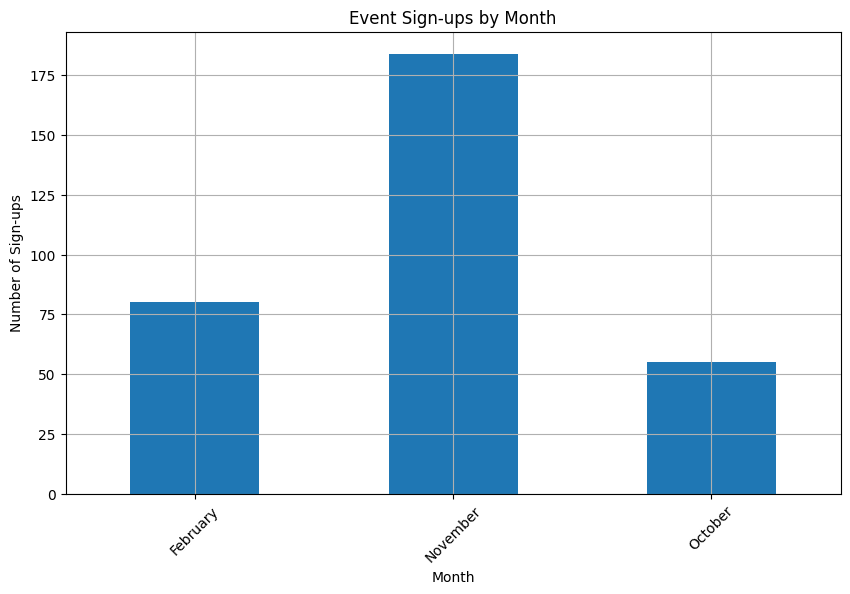

In [ ]:
import matplotlib.pyplot as plt

# group data by month and count the number of sign-ups
attendance_by_month = data.groupby('Month').size()

# plotting attendance by month
plt.figure(figsize=(10, 6))
attendance_by_month.plot(kind='bar')
plt.title('Event Sign-ups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sign-ups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


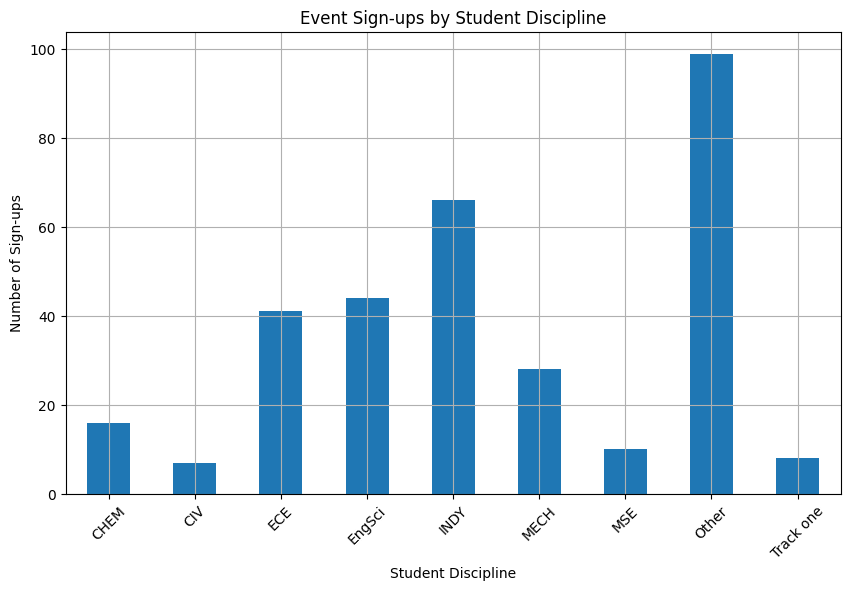

In [ ]:
# group data by student discipline and count the number of sign-ups
attendance_by_discipline = data.groupby('StudentDiscipline').size()

# plotting attendance by student discipline
plt.figure(figsize=(10, 6))
attendance_by_discipline.plot(kind='bar')
plt.title('Event Sign-ups by Student Discipline')
plt.xlabel('Student Discipline')
plt.ylabel('Number of Sign-ups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


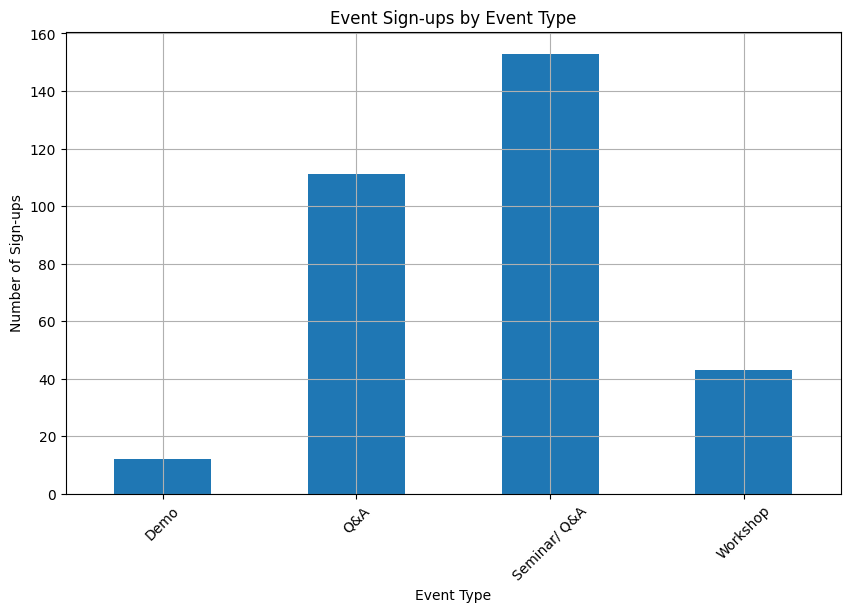

In [ ]:
# group data by event type and count the number of sign-ups
attendance_by_event_type = data.groupby('EventType').size()

# plotting attendance by event type
plt.figure(figsize=(10, 6))
attendance_by_event_type.plot(kind='bar')
plt.title('Event Sign-ups by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Number of Sign-ups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


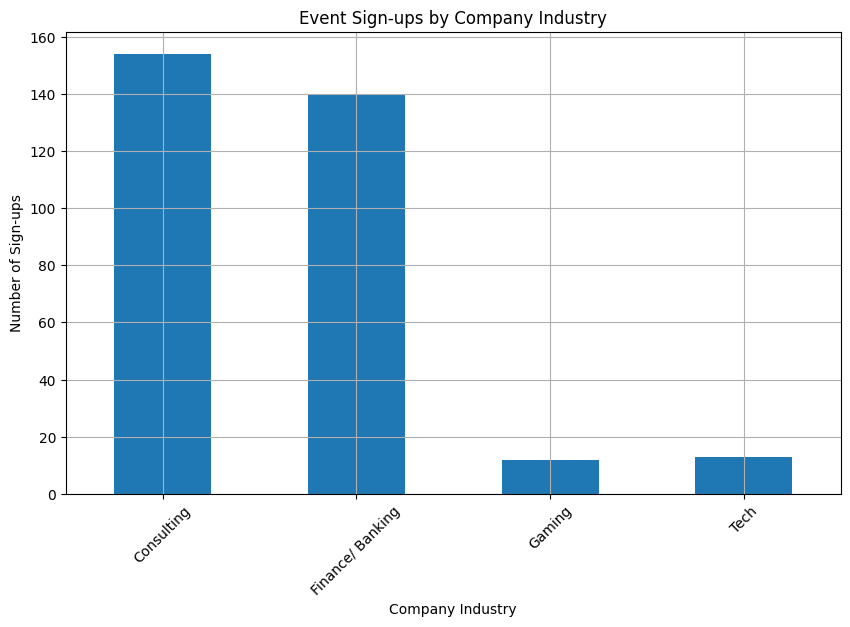

In [ ]:
# group data by company industry and count the number of sign-ups
attendance_by_industry = data.groupby('CompanyIndustry').size()

# plotting attendance by company industry
plt.figure(figsize=(10, 6))
attendance_by_industry.plot(kind='bar')
plt.title('Event Sign-ups by Company Industry')
plt.xlabel('Company Industry')
plt.ylabel('Number of Sign-ups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns


Step 3: Visualize

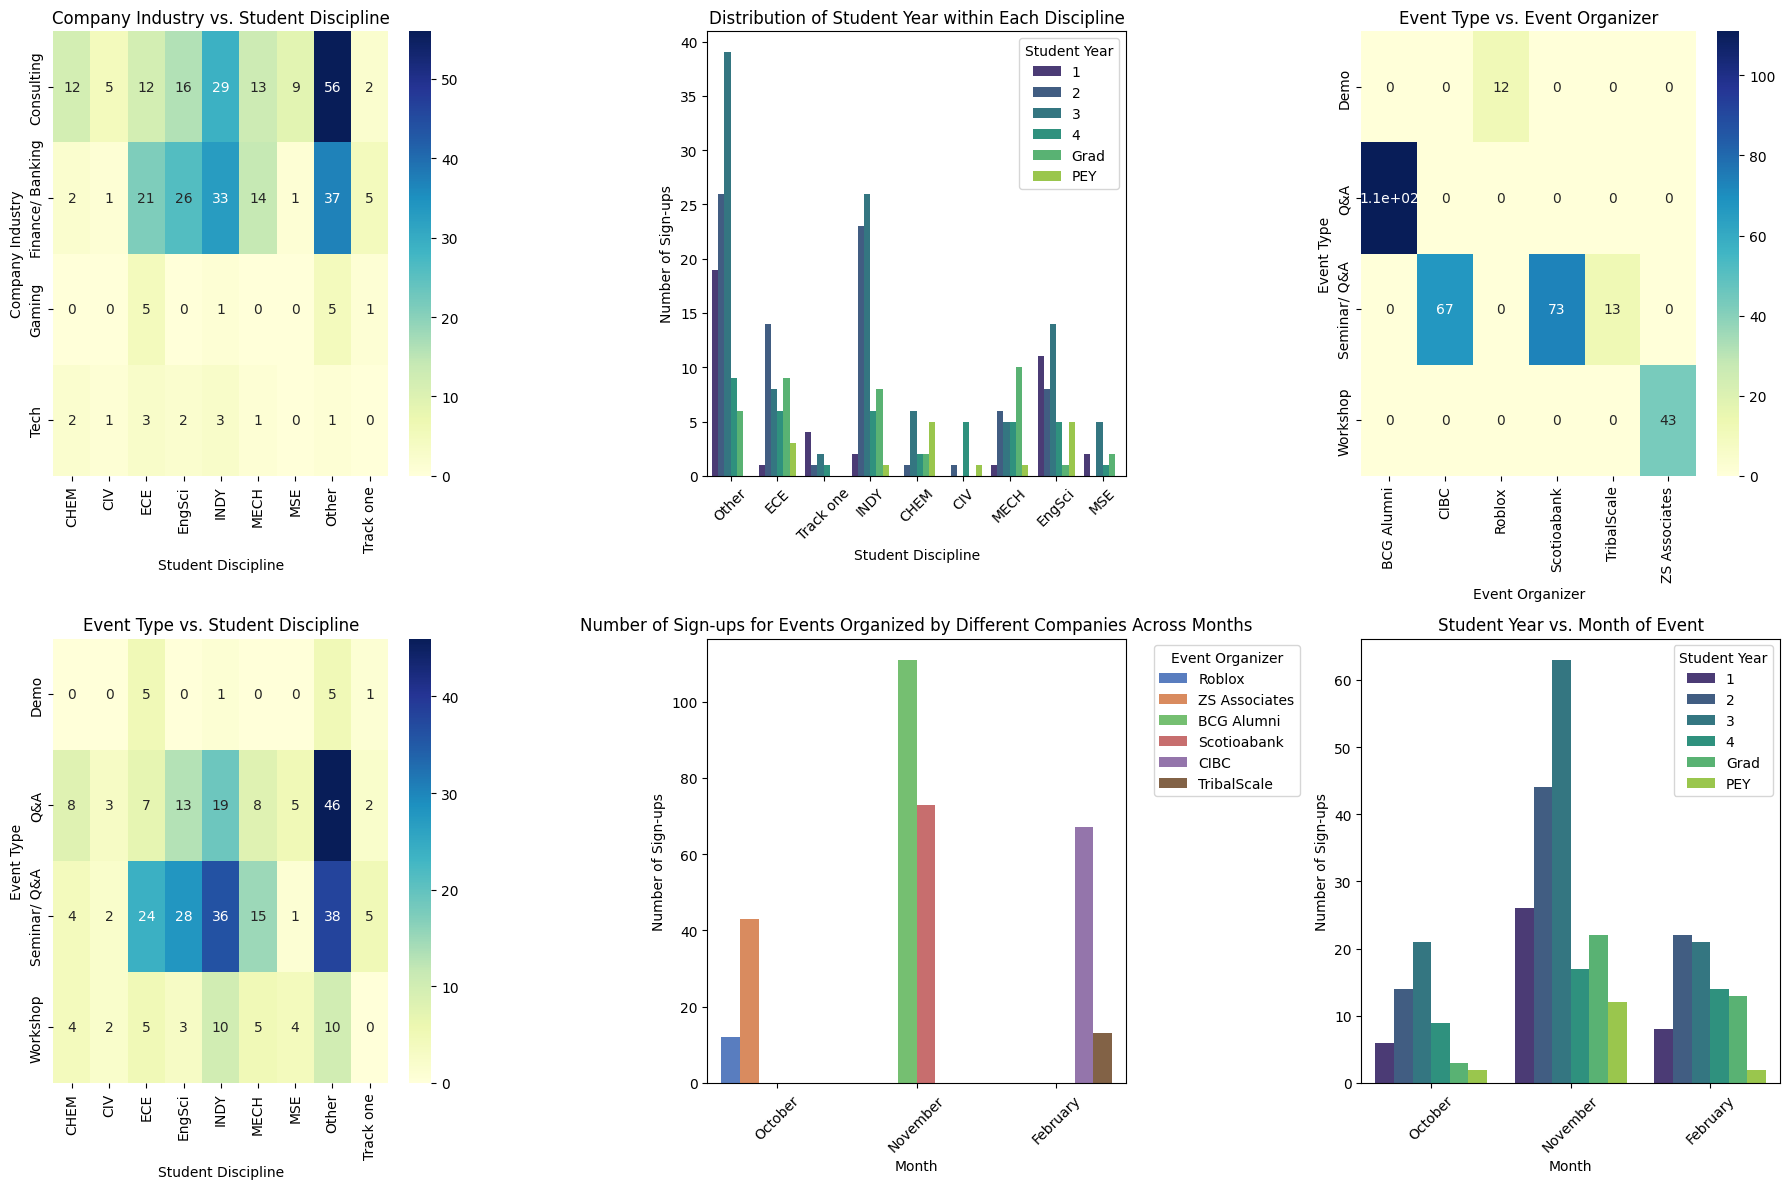

In [ ]:
# set up the figure and axes for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# student discipline vs. company industry
cross_tab_discipline_industry = pd.crosstab(data['CompanyIndustry'], data['StudentDiscipline'])
sns.heatmap(cross_tab_discipline_industry, annot=True, cmap="YlGnBu", ax=axes[0, 0])
axes[0, 0].set_title("Company Industry vs. Student Discipline")
axes[0, 0].set_xlabel("Student Discipline")
axes[0, 0].set_ylabel("Company Industry")

# student year vs. student discipline
sns.countplot(data=data, x='StudentDiscipline', hue='StudentYear', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Student Year within Each Discipline')
axes[0, 1].set_xlabel('Student Discipline')
axes[0, 1].set_ylabel('Number of Sign-ups')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(title='Student Year')

# event type vs. event organizer
cross_tab_event_type_organizer = pd.crosstab(data['EventType'], data['EventOrganizer'])
sns.heatmap(cross_tab_event_type_organizer, annot=True, cmap="YlGnBu", ax=axes[0, 2])
axes[0, 2].set_title("Event Type vs. Event Organizer")
axes[0, 2].set_xlabel("Event Organizer")
axes[0, 2].set_ylabel("Event Type")

# event type vs. student discipline
cross_tab_event_type_discipline = pd.crosstab(data['EventType'], data['StudentDiscipline'])
sns.heatmap(cross_tab_event_type_discipline, annot=True, cmap="YlGnBu", ax=axes[1, 0])
axes[1, 0].set_title("Event Type vs. Student Discipline")
axes[1, 0].set_xlabel("Student Discipline")
axes[1, 0].set_ylabel("Event Type")

# event organizer vs. month
sns.countplot(data=data, x='Month', hue='EventOrganizer', palette='muted', ax=axes[1, 1])
axes[1, 1].set_title('Number of Sign-ups for Events Organized by Different Companies Across Months')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Number of Sign-ups')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Event Organizer', bbox_to_anchor=(1.05, 1), loc='upper left')

# student year vs. month of event
sns.countplot(data=data, x='Month', hue='StudentYear', palette='viridis', ax=axes[1, 2])
axes[1, 2].set_title('Student Year vs. Month of Event')
axes[1, 2].set_xlabel('Month')
axes[1, 2].set_ylabel('Number of Sign-ups')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].legend(title='Student Year')

# adjust layout
plt.tight_layout()

# show the plot
plt.show()


<ipython-input-64-de2e93ffab28>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Time', palette='Blues_d', ax=axes[0, 0])
<ipython-input-64-de2e93ffab28>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='DayOfWeek', palette='Greens_d', ax=axes[0, 1])
<ipython-input-64-de2e93ffab28>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


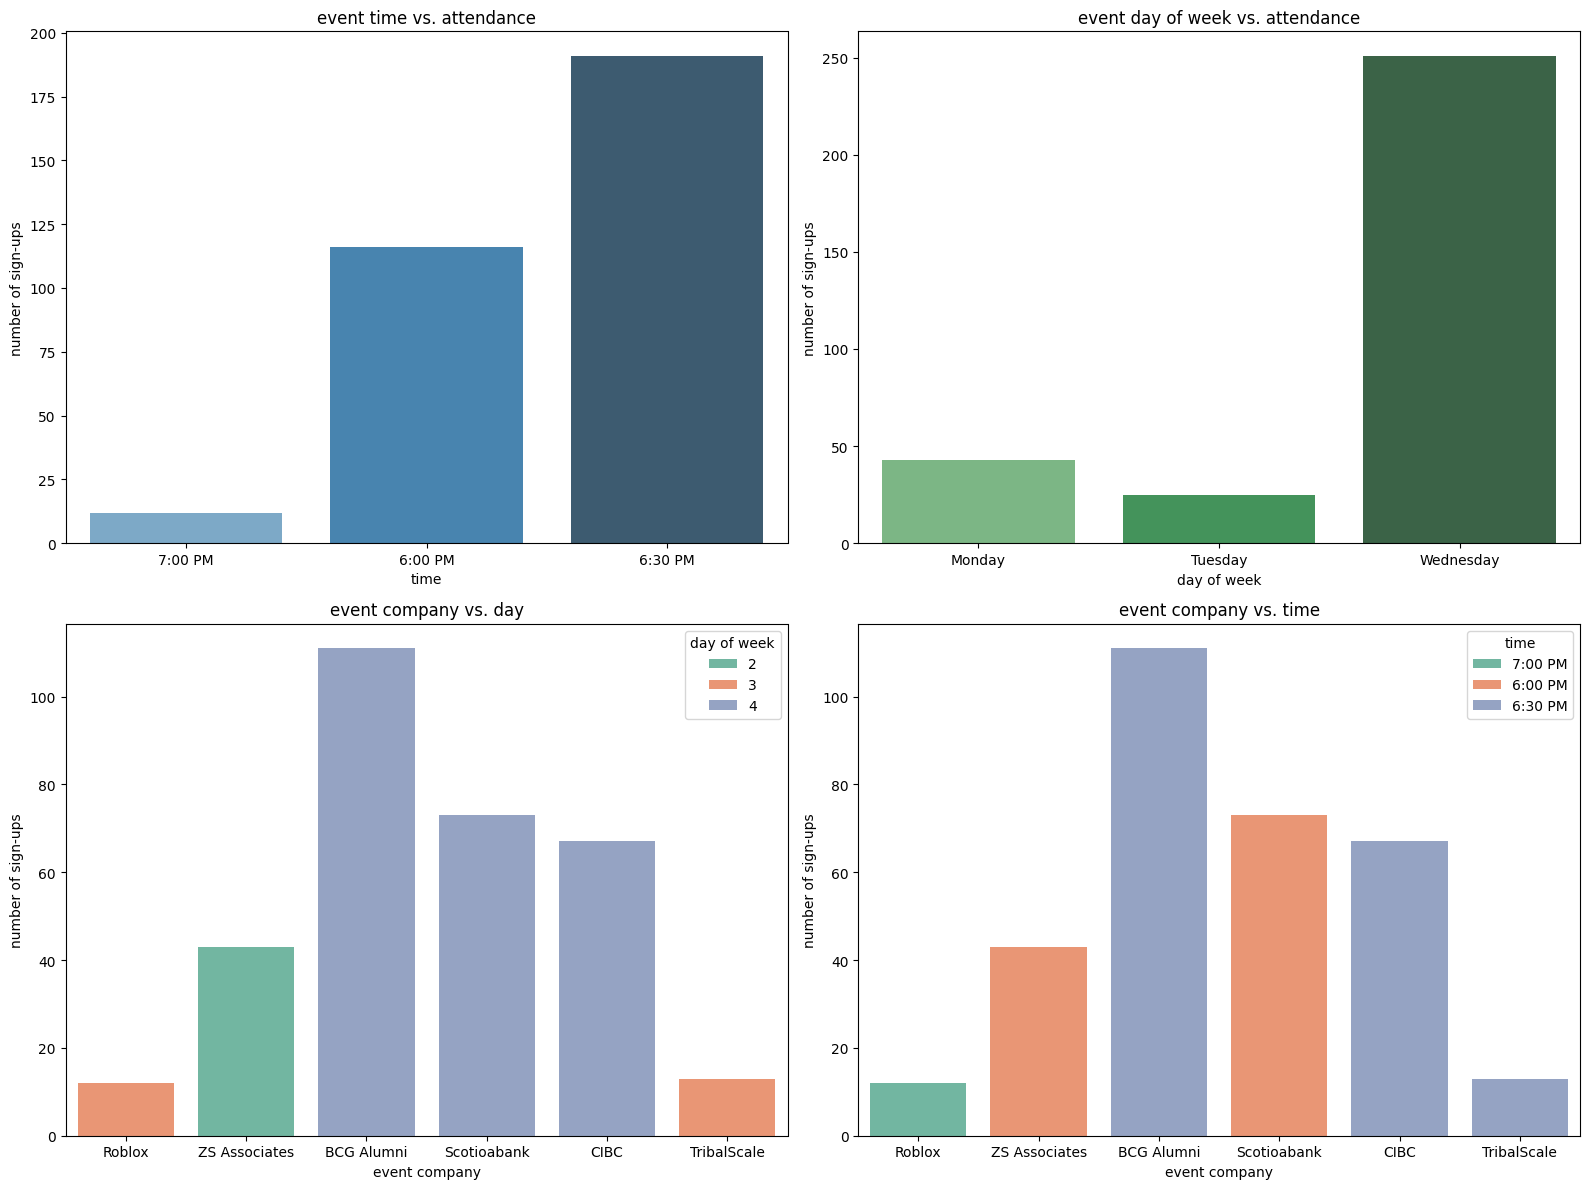

In [ ]:

# set up the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# event time vs. attendance
sns.countplot(data=data, x='Time', palette='Blues_d', ax=axes[0, 0])
axes[0, 0].set_title('event time vs. attendance')
axes[0, 0].set_xlabel('time')
axes[0, 0].set_ylabel('number of sign-ups')

# event day of week vs. attendance
sns.countplot(data=data, x='DayOfWeek', palette='Greens_d', ax=axes[0, 1])
axes[0, 1].set_title('event day of week vs. attendance')
axes[0, 1].set_xlabel('day of week')
axes[0, 1].set_ylabel('number of sign-ups')
axes[0, 1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# event company vs. day
sns.countplot(data=data, x='EventOrganizer', hue='DayOfWeek', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('event company vs. day')
axes[1, 0].set_xlabel('event company')
axes[1, 0].set_ylabel('number of sign-ups')
axes[1, 0].legend(title='day of week', loc='upper right')

# event company vs. time
sns.countplot(data=data, x='EventOrganizer', hue='Time', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('event company vs. time')
axes[1, 1].set_xlabel('event company')
axes[1, 1].set_ylabel('number of sign-ups')
axes[1, 1].legend(title='time', loc='upper right')

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

Step 4: Summary Writing

Based on the analysis of YNCN event attendance data, there are multiple interesting trends and relationships. Event sign-ups peak in November, followed by October and February, with November significantly higher than the other months. The majority of attendees come from the "Other" program, followed by INDY, Engineering Science, and ECE. Events related to Consulting and Finance/Banking industries attract the most sign-ups, while Gaming and Tech events have lower attendance. Within specific industries, Consulting and Finance/Banking events attract attendees mainly from the "Other" program and INDY, while Gaming and Tech events attract more attendees from ECE and the "Other" program. Attendance is lowest among 1st-year students and highest among 3rd-year students, followed by 2nd-year students. For other years and graduate students, there are fluctuations in attendance. Events hosted by BCG and Scotiabank have high attendance, followed by CIBC, while TribalScale and Roblox events have lower attendance. These insights suggest opportunities for YNCN to optimize event planning and marketing strategies by scheduling events during peak attendance months, targeting specific disciplines for events focused on industries that align with them most, considering students' year distribution, and developing plans to invite high-demand companies.